<a href="https://colab.research.google.com/github/RahulArya15/credit-card-fraud-detection/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes = True)

In [9]:
!pip install kaggle
!mkdir ~/.kaggle/
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [10]:
!kaggle datasets download -d dhanushnarayananr/credit-card-fraud

 87% 25.0M/28.9M [00:00<00:00, 93.8MB/s]
100% 28.9M/28.9M [00:00<00:00, 98.3MB/s]


In [11]:
! unzip credit-card-fraud.zip

Archive:  credit-card-fraud.zip
  inflating: card_transdata.csv      


In [12]:
df = pd.read_csv('/content/credit-card-fraud.zip')
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [13]:
df.isnull().head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [14]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [15]:
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [16]:
df['repeat_retailer'] = (df['repeat_retailer']).astype(int)
df['used_chip'] = (df['used_chip']).astype(int)
df['used_pin_number'] = (df['used_pin_number']).astype(int)
df['online_order'] = (df['online_order']).astype(int)
df['fraud'] = (df['fraud']).astype(int)
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                     int64
used_chip                           int64
used_pin_number                     int64
online_order                        int64
fraud                               int64
dtype: object

In [17]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


0    912597
1     87403
Name: fraud, dtype: int64


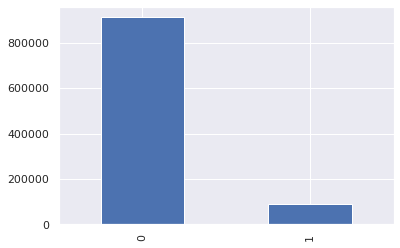

In [18]:
#Counting 1 and 0 Value in fraud column
print(df.fraud.value_counts())
p=df.fraud.value_counts().plot(kind="bar")

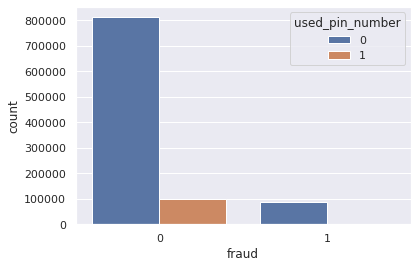

In [19]:
sns.countplot(data=df, x='fraud', hue = "used_pin_number")

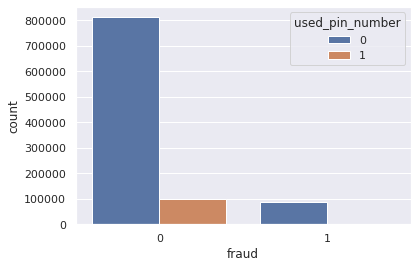

In [20]:
sns.countplot(data=df , x = "fraud", hue = "used_pin_number")

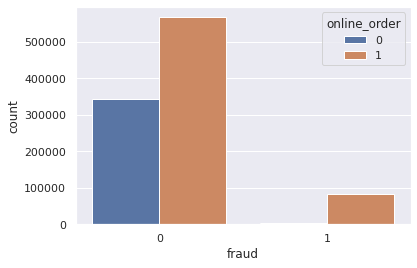

In [21]:
sns.countplot(data = df , x = "fraud", hue = 'online_order')

In [22]:
X = df.drop('fraud', axis = 1)
Y = df['fraud']

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2 , random_state = 7)

Decisioin tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)


DecisionTreeClassifier()

In [25]:
y_pred = dtree.predict(X_test)
print("Accuracy :", accuracy_score(Y_test, y_pred)*100,"%")

Accuracy : 99.9985 %


naive bayes

In [26]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [27]:
y_pred = nb.predict(X_test)
print("Accuracy: ", accuracy_score(Y_test, y_pred)*100, "%")

Accuracy:  95.1595 %


random forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [29]:
y_pred = rfc.predict(X_test)
print("accuracy: ", accuracy_score(Y_test, y_pred)*100,"%")

accuracy:  100.0 %


neural network

In [30]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier()
nn.fit(X_train, Y_train)

MLPClassifier()

In [31]:
y_pred = nn.predict(X_test)
print("accuracy: ", accuracy_score(Y_test, y_pred)*100 , "%")

accuracy:  99.847 %


logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, Y_train)


In [33]:
y_pred = lr.predict(X_test)
print("accuracy: ", accuracy_score(Y_test, y_pred)*100 , "%")

accuracy:  95.8365 %
